# 10章　データの集約とグループ演算

In [1]:
import numpy as np
import pandas as pd

## 10.1 GrooupByの仕組み

In [2]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})

In [3]:
df

,key1,key2,data1,data2
0,a,one,-0.364488,-0.795124
1,a,two,-0.185782,-1.613271
2,b,one,-1.675386,1.629960
3,b,two,0.348146,-1.256994
4,a,one,0.838760,-1.402894


In [4]:
# key1ラベルでグループ化する
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped

In [5]:
# それぞれのグループで平均を計算する
grouped.mean()

key1
a   -0.807815
b   -0.309376
Name: data1, dtype: float64

In [6]:
# グループキーを複数にするには
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one    -0.365579
      two    -1.692288
b     one    -1.605550
      two     0.986799
Name: data1, dtype: float64

In [8]:
# シリーズはキーで観測された独立な組み合わせが含まれる階層的なインデックスを持つ
means.unstack()

key2,one,two
key1,,
a,0.237136,-0.185782
b,-1.675386,0.348146


In [9]:
# 正しい長さの配列をグループキーに使うことも出来る
strings = np.array(['AA','BB','BB','DD','EE'])
years = np.array([2005,2005,2006,2005,2006])

In [10]:
df['data1'].groupby([strings,years]).mean()

AA  2005   -0.364488
BB  2005   -0.185782
    2006   -1.675386
DD  2005    0.348146
EE  2006    0.838760
Name: data1, dtype: float64

In [7]:
# グループキーとしてデータが含まれている列名を渡すことができる
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.807815,0.475096
b,-0.309376,0.774060


In [9]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.365579  0.103482
     two  -1.692288  1.218324
b    one  -1.605550  1.284578
     two   0.986799  0.263543

In [11]:
# 各グループのサイズ情報を見るにはsizeメソッド
# グループキーに含まれる欠損値は結果から除外
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 10.1.1　グループをまたいだ繰り返し   

In [12]:
# Groupbyオブジェクトは繰り返し処理の時
# グループのnameとnameに対応するデータ(group)の2つを含むシーケンスを生成する 　
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.013720 -0.623255
1    a  two -1.692288  1.218324
4    a  one  0.282561  0.830220
b
  key1 key2     data1     data2
2    b  one -1.605550  1.284578
3    b  two  0.986799  0.263543


In [13]:
# 複数キーを扱う場合、キーの値のタプルになっている
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.364488 -0.795124
4    a  one  0.838760 -1.402894
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.185782 -1.613271
('b', 'one')
  key1 key2     data1    data2
2    b  one -1.675386  1.62996
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.348146 -1.256994


In [14]:
# 辞書形式に変換する処理
pieces = dict(list(df.groupby('key1')))

In [15]:
pieces['a']

,key1,key2,data1,data2
0,a,one,-0.364488,-0.795124
1,a,two,-0.185782,-1.613271
4,a,one,0.838760,-1.402894


In [16]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [14]:
# デフォルトのGroupbyはaxis=0だが、別の軸(axis)に設定出来る
grouped = df.groupby(df.dtypes, axis=1)

for dtype,group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -1.013720 -0.623255
1 -1.692288  1.218324
2 -1.605550  1.284578
3  0.986799  0.263543
4  0.282561  0.830220
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## 10.1.2　列や列の集合の選択

In [20]:
#aとbは同じ、aはgroupyオブジェクトに対してindex参照している

a = df.groupby('key1')['data1']
b = df['data1'].groupby(df['key1'])
print('a:',a.mean())
print('b', b.mean())


a: key1
a   -0.807815
b   -0.309376
Name: data1, dtype: float64
b key1
a   -0.807815
b   -0.309376
Name: data1, dtype: float64


In [17]:
# data2列だけの平均値を計算して結果をdfで得る場合(index参照でリストか配列にする)
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -1.099009
     two  -1.613271
b    one   1.629960
     two  -1.256994

In [24]:
# data2列だけの平均値を求めて結果をシリーズで得る場合(index参照で単独の列名を入れる)
df.groupby(['key1','key2'])['data2'].mean()

key1  key2
a     one     0.103482
      two     1.218324
b     one     1.284578
      two     0.263543
Name: data2, dtype: float64

## 10.1.3 ディクショナリやシリーズのグループ化

In [3]:
# 辞書でマッピング情報を作ってGroupbyに渡す事が出来る
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index=['AA','BB','CC','DD','EE'])

In [26]:
people.iloc[2:3,[1,2]] = np.nan
people

,a,b,c,d,e
AA,0.812010,1.256653,0.446928,-0.752683,0.697404
BB,0.006675,1.256700,-1.384453,0.561257,-0.678591
CC,-0.571226,NaN,NaN,0.422476,-0.779870
DD,1.274903,0.020187,0.290211,0.243572,0.978875
EE,1.550549,-0.448870,-0.607468,-0.232953,2.355251


In [28]:
# 使用しないグループキー'f'があってもOK
mapping = {'a':'red','b': 'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [29]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
AA,-0.305754,2.766067
BB,-0.823196,0.584784
CC,0.422476,-1.351095
DD,0.533783,2.273964
EE,-0.840421,3.456930


In [30]:
# シリーズもgroupbyに渡して使うことが出来る
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series, axis=1).count()

,blue,red
AA,2,3
BB,2,3
CC,1,2
DD,2,3
EE,2,3


## 10.1.4 関数を使ったグループ化

In [4]:
# 名前の文字数を基にグループ化
people.groupby(len).mean()

,a,b,c,d,e
2,0.647286,-0.41002,-0.263011,0.653938,-0.190704


In [5]:
# 配列、辞書、シリーズと関数が混在してもOK
key_list=['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
2 one -0.800440 -1.045573 -0.871936  0.206689 -1.155406
  two  0.083571 -0.465004 -0.027141  0.278796 -1.299362

## 10.1.5 インデックス階層によるグループ化

In [7]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                   [1,3,5,1,3]],
                                  names=['cty', 'tenor'])

hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.764457 -0.640307 -1.549135 -0.015104  1.061489
1     -0.942512  0.144530 -1.917887  0.042140  0.001933
2     -0.775748 -1.174114  0.506998  1.239980  0.377151
3     -2.171691 -0.934999  0.150872  0.911212 -0.683228

In [8]:
# 階層ごとに集約するには階層の番号やlevelキーワードを使って階層を指定する
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 10.2 データの集約
### 集約とはデータ変形を行い配列からスカラーを生成すること

### ■最適済みのGroupbyメソッド
- count : グループ内の欠損値以外の値の数
- sum : 欠損値以外の合計
- mean : 欠損値以外の平均
- median : 欠損値以外の算術中央値
- std,var : 標準偏差と分散
- min,max : 欠損値以外の最小値と最大値
- prod : 欠損値以外の積
- first,last : 欠損値以外の最初と最後の値

In [9]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})

df

,key1,key2,data1,data2
0,a,one,1.224419,0.043070
1,a,two,1.506189,-0.054222
2,b,one,0.768726,1.647829
3,b,two,-0.275521,-0.775395
4,a,one,-1.804052,1.877815


In [10]:
# シリーズのメソッドであるquantileメソッドも使用可能
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.449835
b    0.664301
Name: data1, dtype: float64

In [11]:
#自分で定義した集約関数を使うにはaggregeteあるいはaggメソッドに渡す

def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,3.310242,1.932037
b,1.044247,2.423225


In [12]:
# describeも有効
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.308852  1.835245 -1.804052 -0.289817  1.224419  1.365304   
b      2.0  0.246603  0.738394 -0.275521 -0.014459  0.246603  0.507664   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.506189   3.0  0.622221  1.088464 -0.054222 -0.005576  0.043070   
b     0.768726   2.0  0.436217  1.713479 -0.775395 -0.169589  0.436217   

                          
           75%       max  
key1                      
a     0.960442  1.877815  
b     1.042023  1.647829

## 10.2.1 列に複数の関数を適用する

In [13]:
tips = pd.read_csv('./pydata-book-2nd-edition/examples/tips.csv')

In [14]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [15]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [16]:
grouped = tips.groupby(['day', 'smoker'])

In [17]:
grouped_pct = grouped['tip_pct']

In [19]:
grouped_pct.mean()

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [20]:
#aggメソッドを使えば同じ事が出来る
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [21]:
# 関数の名前のリストを渡すと複数可能
grouped['tip_pct'].agg(['mean','std','count'])

mean       std  count
day  smoker                           
Fri  No      0.151650  0.028123      4
     Yes     0.174783  0.051293     15
Sat  No      0.158048  0.039767     45
     Yes     0.147906  0.061375     42
Sun  No      0.160113  0.042347     57
     Yes     0.187250  0.154134     19
Thur No      0.160298  0.038774     45
     Yes     0.163863  0.039389     17

In [22]:
# (名前,関数)という形式のタプルをリストに渡せば列名を変更出来る
grouped['tip_pct'].agg([('foo','mean'),('bar','std')])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [23]:
# 同じ３つの統計値の計算をそれぞれの列に適用する場合
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [24]:
# 複数の列にそれぞれ異なる関数を適用するには列名と関数をマッピングした辞書をaggに渡す
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [25]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
            'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

## 10.2.2 集約されたデータを行インデックスなしで戻す

In [35]:
# 通常は集約されたデータはインデックス付けされている
tips.groupby(['day','smoker']).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [36]:
# as_index=Falseをgroupbyの引数に渡すとインデックス化を無効化できる
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 10.3 applyメソッド：一般的な分離-適用-結合の方法

In [2]:
tips = pd.read_csv('./pydata-book-2nd-edition/examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [3]:
# 特定の列の上位の値を持つ行を選択する関数
def top(df, n=5, column = 'tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [30]:
# smoker列でグループ分けし、apply使ってtop関数を適用する
# top関数がdfの各グループで呼ばれ、結果がpandas.concatで結合され、それぞれのグループに名前がついた
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [40]:
# 引数やキーワードが必要な関数は、関数の後ろに引数を指定できる
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [41]:
tips.groupby(['smoker','day']).apply(max)

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                         
No     Fri        22.75   3.50     No   Fri   Lunch     3  0.187735
       Sat        48.33   9.00     No   Sat  Dinner     4  0.291990
       Sun        48.17   6.00     No   Sun  Dinner     6  0.252672
       Thur       41.19   6.70     No  Thur   Lunch     6  0.266312
Yes    Fri        40.17   4.73    Yes   Fri   Lunch     4  0.263480
       Sat        50.81  10.00    Yes   Sat  Dinner     5  0.325733
       Sun        45.35   6.50    Yes   Sun  Dinner     5  0.710345
       Thur       43.11   5.00    Yes  Thur   Lunch     4  0.241255

## 10.3.1　グループキーの抑制

In [4]:
# グループキーごとのインデックス形式を無効にする
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


## 10.3.2 分位点とビン分析
### Categoricalオブジェクトはそのままgroupbyに渡すことが可能

In [10]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)

In [6]:
frame

,data1,data2
0,1.075405,0.093705
1,-1.211390,-0.515606
2,-0.506597,-1.227778
3,0.249988,-0.595838
4,-0.318561,-0.802127
...,...,...
995,-0.499281,-1.868070
996,1.599992,-0.829098
997,1.909746,1.675420
998,0.270894,-0.746348


In [11]:
quartiles[:10]

0    (-1.309, 0.374]
1    (-1.309, 0.374]
2    (-1.309, 0.374]
3     (0.374, 2.057]
4    (-1.309, 0.374]
5     (0.374, 2.057]
6    (-1.309, 0.374]
7    (-1.309, 0.374]
8    (-1.309, 0.374]
9     (0.374, 2.057]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.999, -1.309] < (-1.309, 0.374] < (0.374, 2.057] < (2.057, 3.74]]

In [45]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [46]:
# Categoricalオブジェクトはそのままgroupbyに渡すことが可能
groupd = frame.data2.groupby(quartiles)
groupd.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.01, -1.381]",-3.231169,2.286145,84.0,0.068113
"(-1.381, 0.242]",-3.569008,3.009156,488.0,0.075319
"(0.242, 1.865]",-2.962673,2.784809,387.0,-0.067640
"(1.865, 3.487]",-2.160279,2.279256,41.0,0.105197


In [47]:
#サンプルデータの分位点に基づき同じ個数のデータ入ったbinにするにはqcutを使う
# labels=Falseを渡すと分位点の数値を得る

#分位点の数値を戻す
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.231169,2.834906,100.0,0.084557
1,-3.569008,3.009156,100.0,0.262329
2,-2.173979,2.756754,100.0,-0.074858
3,-2.264153,2.110720,100.0,0.000497
4,-2.259208,2.601715,100.0,0.119792
5,-2.962673,2.093719,100.0,-0.049580
6,-1.975903,2.564881,100.0,-0.064564
7,-2.501021,2.506454,100.0,-0.112249
8,-1.837510,2.784809,100.0,-0.053167


## 10.3.3 例：グループ固有の値で欠損値を埋める

In [48]:
s = pd.Series(np.random.randn(6))
s[::2]= np.nan
s

0         NaN
1    0.543534
2         NaN
3    1.468213
4         NaN
5    1.090708
dtype: float64

In [49]:
# fillnaは導出した値でnullを穴埋めするのに便利
s.fillna(s.mean())

0    1.034152
1    0.543534
2    1.034152
3    1.468213
4    1.034152
5    1.090708
dtype: float64

In [50]:
s.mean()

1.0341516157790405

- 欠損値を受ける値をグループによって変えたい場合

In [ ]:
word = ['AA','BB','CC','DD','EE','FF','GG','HH']
group_key = ['East'] *4 + ['West'] *4
data = pd.Series(np.random.randn(8), index=word)
data

In [52]:
data[['CC','FF','HH']] = np.nan
data

AA   -0.706119
BB   -1.039439
CC         NaN
DD   -0.066789
EE    1.335035
FF         NaN
GG    0.928964
HH         NaN
dtype: float64

In [53]:
data.groupby(group_key).mean()

East   -0.604116
West    1.132000
dtype: float64

In [54]:
# 欠損値をグループの平均値で埋める方法
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

AA   -0.706119
BB   -1.039439
CC   -0.604116
DD   -0.066789
EE    1.335035
FF    1.132000
GG    0.928964
HH    1.132000
dtype: float64

In [55]:
# あらかじめ決められた値で埋める方法
# groupは内部的にname属性をもっているのでそれを使う
fill_values = {'East':0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

AA   -0.706119
BB   -1.039439
CC    0.500000
DD   -0.066789
EE    1.335035
FF   -1.000000
GG    0.928964
HH   -1.000000
dtype: float64

## 10.3.4　例：ランダムサンプリングと順列
- 巨大なデータセットからランダムにサンプルデータを抽出する場合

In [21]:
# トランプのデッキを作る
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1,11)) + [10] * 3 ) * 4
base_names = ['A'] + list(range(2,11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)   

In [22]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [23]:
# カードのデッキから5枚のカードを手元に引く
def draw(deek, n=5):
    return deck.sample(n)

draw(deck)

9D     9
8S     8
9H     9
JC    10
KC    10
dtype: int64

In [24]:
# 2つのランダムなカードそれぞれのグループから取り出したい場合

get_suit = lambda card: card[-1]

deck.groupby(get_suit).apply(draw, n=2)

C  8D      8
   3C      3
D  6D      6
   JD     10
H  3D      3
   9C      9
S  10C    10
   7S      7
dtype: int64

## 10.3.5　グループの加重平均と相関

- グループの加重平均値のようなdfの複数の列間の操作や２つのシリーズの操作も可能

In [56]:
df = pd.DataFrame({'category': ['a','a','a','a',
                                'b','b','b','b',],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})

In [57]:
df

,category,data,weights
0,a,0.299533,0.839360
1,a,0.896952,0.457860
2,a,-0.622507,0.273053
3,a,3.034258,0.859248
4,b,-0.196132,0.279716
5,b,1.052436,0.293527
6,b,-0.599772,0.375922
7,b,0.397247,0.933867


In [58]:
# グループの加重平均を求める
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    1.275682
b    0.212192
dtype: float64

- 日時の利益(パーセント変化から算出)とSPXとの年次相関を求める

In [59]:
# Yahoo! Financeから取得した金融データ
close_px = pd.read_csv('./pydata-book-2nd-edition/examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [60]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [61]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [62]:
#特定の列と’SPX'との相関を計算
spx_corr = lambda x: x.corrwith(x['SPX'])

# pct_changeを使ってパーセント変化を計算する
rets = close_px.pct_change().dropna()

In [63]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [64]:
# 列間の相関を計算
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 10.3.6 例：グループ指向の線形回帰

In [65]:
# statmodelsを使用したregress関数を使って線形回帰を求める
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] =1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [66]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 10.4 ピボットテーブルとクロス集計

## <span style="color: lime; ">■pivot_tableのオプション</span>
- values: 集約する列の名称。デフォルトではすべての数値列を集約する
- index: ピボットテーブルの行でGp化する為の列名かその他のGpキー
- columns: ピボットテーブルの列でGp化するための列名かその他のGpキー
- aggfunc: 集約に用いる関数や、関数のリスト。'mean'がデフォルト
- fill_value: 結果のテーブルで欠損値を置き換えるための値
- dropna: Trueを指定すると、すべての要素がNAである列を除外する
- margins: 行・列の小計や合計を追加する。デフォルトはFalse

In [5]:
tips = pd.read_csv('./pydata-book-2nd-edition/examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [6]:
# pivot_table関数を使うとデフォルトは平均値で計算
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [7]:
# 上記をgroupbyで処理した結果
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [8]:
# smokerをテーブルの列、dayを行に配列
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns= 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [70]:
# 小計情報を追加するにはmargeins=Trueを指定する
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns= 'smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [71]:
# デフォルト以外の集約関数を使う場合はaggfuncに関数を渡す
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns= 'smoker',aggfunc= len )

size       tip_pct      
smoker         No   Yes      No   Yes
time   day                           
Dinner Fri    3.0   9.0     3.0   9.0
       Sat   45.0  42.0    45.0  42.0
       Sun   57.0  19.0    57.0  19.0
       Thur   1.0   NaN     1.0   NaN
Lunch  Fri    1.0   6.0     1.0   6.0
       Thur  44.0  17.0    44.0  17.0

In [72]:
# fill _valueを指定して穴埋めも可能
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],columns='day', aggfunc=sum, fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.418867  4.067615  4.559198  0.159744
            Yes     1.370377  4.162693  2.494717  0.000000
       3    No      0.000000  1.855926  1.679296  0.000000
            Yes     0.000000  0.869969  0.610639  0.000000
       4    No      0.000000  1.050673  2.370288  0.000000
            Yes     0.117750  0.747088  0.386740  0.000000
       5    No      0.000000  0.000000  0.413857  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  5.644187
            Yes     0.909843  0.000000  0.000000  2.064953
       3    No      0.187735  0.000000  0.000000  0.168492
            Yes     0.000000  0.000000  0.000000  0.409904
       4    No      0.000000  0.000000  0.000000  0.416757
            Yes     0.000000  0.000000  0.000000  0.310819
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.521118

## 10.4.1 クロス集計： crosstab メソッド
- クロス集計はグループの出現頻度を計算する

In [9]:
data2 = pd.DataFrame({'Sample':[1,2,3,4,5,6,7,8,9,10],
                     'Nationality':['USA','Jpn','USA','Jpn','Jpn','Jpn','USA','USA','Jpn','USA'],
                     'Handedness':['Right','Left','Right','Right','Left','Right','Right','Left','Right','Right',]})

In [75]:
data2

,Sample,Nationality,Handedness
0,1,USA,Right
1,2,Jpn,Left
2,3,USA,Right
3,4,Jpn,Right
4,5,Jpn,Left
5,6,Jpn,Right
6,7,USA,Right
7,8,USA,Left
8,9,Jpn,Right
9,10,USA,Right


In [76]:
pd.crosstab(data2.Nationality, data2.Handedness, margins=True)

Handedness,Left,Right,All
Nationality,,,
Jpn,2,3,5
USA,1,4,5
All,3,7,10


In [11]:
# corsstabの最初の２つの引数は配列、シリーズ、配列のリストを使うことが出来る
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 11章時系列データ

## 11.1 日時、時間のデータ型とツール

In [2]:
# Python標準ライブラリ　datetime
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2020, 7, 28, 20, 13, 13, 860563)

In [78]:
now.year, now.month, now.day

(2020, 5, 6)

In [14]:
now.month

7

In [79]:
# timedeltaはdatetimeオブジェクトやdateオブジェクト間の差を表す
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [80]:
delta.days

926

In [81]:
delta.seconds

56700

In [82]:
# timedeltaをつかってdatetimeオブジェクトに足し引きして新しいdatetimeオブジェクトが作れる
from datetime import timedelta
start = datetime(2011, 1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [83]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### ■datetimeモジュールに含まれるデータ型
- date: 日付(年,月,日)の情報を持つ
- time: 1日の時間の情報(時,分,秒,マイクロ秒)を持つ
- datetime: 日付と時間の両方の情報を持つ
- timedelta: ２つのdatetime型の値の差を、日,秒,マイクロ秒で表す
- tzinfo: タイムゾーン情報を持つ基本の型

## 11.1.1 文字列とdatetimeの変換
- strやstrtimeメソッドで書式を指定し文字列で表現できる

In [84]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [85]:
# strftimeで時間を文字列へ
stamp.strftime('%Y-%m-%d')

'2011-01-03'

 ### ■Datetimeフォーマット一覧(ISO C89準拠)
- %Y: 4桁の年
-  %y: 2桁の年
-  %m: 2桁の月[01,12]
-  %d: 2桁の日[01,31]
-  %H: 時間(24時間)[00,23]
-  %I: 時間(12時間)[01,12]
-  %M: 2桁の分[00,59]
-  %S: 秒[00,61]
-  %w: 曜日を表す整数[0(日曜), 6]
-  %U: 1年の週を表す整数[00,53]日曜をその週の最初の日とみなす
-  %W: 1年の週を表す整数[00,53]月曜をその週の最初の日とみなす
-  %z: UTC時間からのずれを+HHMMまたは-HHMM形式で表したもの
-  %F: %Y-%M-%dを短縮したもの、2020-05-01
-  %D: %m%d%yを短縮したもの05/01/20

In [18]:
# strptimeで文字をdata型へ
value = '2020-07-25'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2020, 7, 25, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [21]:
# dateutilのparser.parseメソッドと使うとパースが簡単に出来る
from dateutil.parser import parse

parse('2020-07-25')

datetime.datetime(2020, 7, 25, 0, 0)

In [22]:
# dateutilは人間が理解できる日付表現ならパース可能
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [24]:
# dyafirst=Trueで日が月より前にする
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [25]:
# pandasのdfでto_datetimeでパース出来る
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [27]:
# 欠損値も扱える
# NaT(Not a Time)はpandasでタイムスタンプ型の欠損値
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

 ### datetimeオブジェクトの書式オプション(特定のロケール向けの日付書式)
- %a: 曜日の省略形
- %A: 曜日を完全に表現したもの
- %b: 月の省略形
- %B: 月を完全に表現したもの
- %c: 日付と時間を完全に表現したもの　[Tue 01 May 2012 04:20:57 PM]
- %p: ロケールでの午前と午後を表したもの　AMやPM
- %x: ロケールに適した日付の書式
- %y: ロケールに適した時間の書式

## 11.2 時系列の基本

In [1]:
# pandasでタイムスタンプを使うには基本Pythonの文字列やdatetimeオブジェっとを使う
from datetime import datetime

datas = [datetime(2011,1,2), datetime(2011,1,5),
         datetime(2011,1,7), datetime(2011,1,8),
         datetime(2011,1,10), datetime(2011,1,12),]

In [4]:
ts = pd.Series(np.random.randn(6),index=datas)
ts

2011-01-02   -0.959651
2011-01-05   -1.252654
2011-01-07    0.340225
2011-01-08    0.512291
2011-01-10    0.725660
2011-01-12   -0.140092
dtype: float64

In [5]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [6]:
# シリーズと同じく日付に従って自動的に整形
ts + ts[::2]

2011-01-02   -1.919301
2011-01-05         NaN
2011-01-07    0.680449
2011-01-08         NaN
2011-01-10    1.451320
2011-01-12         NaN
dtype: float64

In [7]:
# pandasはNumpyのdatetime64データ型を使ってナノ秒の精度でタイムスタンプを保存する
ts.index.dtype

dtype('<M8[ns]')

In [8]:
# DatetimeIndexのスカラー値はpandasのタイムスタンプオブジェクトになっている
stamp = ts.index[1]
stamp

Timestamp('2011-01-05 00:00:00')

## 11.2.1 インデックス参照、データの選択、サブセットの抽出

In [9]:
stamp = ts.index[2]
ts[stamp]

0.3402247336022496

In [10]:
# 日付として解釈可能な文字列を使って参照可能
ts['2011/01/08']

0.5122908658831489

In [11]:
ts['20110110']

0.7256600976130059

In [12]:
# 長い時系列でも年や年月を指定して一部を選択可能
longer_ts = pd.Series(np.random.randn(1000),
                     index= pd.date_range('2000/1/1', periods=1000))

In [14]:
# 年を指定した場合
longer_ts['2001']

2001-01-01   -0.459554
2001-01-02    0.972462
2001-01-03    0.708483
2001-01-04   -0.223106
2001-01-05   -0.111368
                ...   
2001-12-27    1.586243
2001-12-28   -0.763638
2001-12-29   -0.126397
2001-12-30   -1.120498
2001-12-31    1.109264
Freq: D, Length: 365, dtype: float64

In [15]:
# 年月を指定した場合
longer_ts['2001-05']

2001-05-01    0.120893
2001-05-02   -0.238823
2001-05-03    1.324708
2001-05-04    1.714625
2001-05-05   -1.376078
2001-05-06   -1.475922
2001-05-07   -0.322353
2001-05-08   -0.030906
2001-05-09   -1.084054
2001-05-10    0.137921
2001-05-11    0.244321
2001-05-12    0.047245
2001-05-13    0.741284
2001-05-14   -0.028417
2001-05-15    0.178076
2001-05-16   -1.557112
2001-05-17   -0.964504
2001-05-18   -1.912012
2001-05-19   -0.109558
2001-05-20    1.006404
2001-05-21   -0.433988
2001-05-22   -1.190005
2001-05-23    0.915290
2001-05-24    0.408202
2001-05-25    0.378367
2001-05-26   -0.374559
2001-05-27    0.664916
2001-05-28    0.024319
2001-05-29   -0.924270
2001-05-30    0.865919
2001-05-31   -0.195405
Freq: D, dtype: float64

In [16]:
# datetimeオブジェクトを指定した場合、2011/1/7以降のデータを表示
ts[datetime(2011, 1, 7):]

2011-01-07    0.340225
2011-01-08    0.512291
2011-01-10    0.725660
2011-01-12   -0.140092
dtype: float64

In [17]:
ts

2011-01-02   -0.959651
2011-01-05   -1.252654
2011-01-07    0.340225
2011-01-08    0.512291
2011-01-10    0.725660
2011-01-12   -0.140092
dtype: float64

In [18]:
# 時系列の中に含まれないタイムスタンプを使って範囲指定可能
ts['2011/01/07': '2011/01/10' ]

2011-01-07    0.340225
2011-01-08    0.512291
2011-01-10    0.725660
dtype: float64

- 時系列データは抽出したデータを修正すると、元のデータにも修正が反映される

In [21]:
# 指定した２つの日付の間の時系列データを取り除くtruncateメソッド
ts.truncate(after='2011/01/09')

2011-01-02   -0.959651
2011-01-05   -1.252654
2011-01-07    0.340225
2011-01-08    0.512291
dtype: float64

In [19]:
dates = pd.date_range('2019/1/1', periods = 100, freq= 'W-WED') #W-WEDは毎水曜日の意味

In [22]:
long_df = pd.DataFrame(np.random.randn(100,4),
                      index= dates,
                      columns=['AA', 'BB', 'CC', 'DD'])

In [23]:
long_df

,AA,BB,CC,DD
2019-01-02,1.146993,0.507387,-1.512231,-0.419309
2019-01-09,-1.063758,0.874681,0.405905,0.735515
2019-01-16,-0.669759,0.823678,-1.209799,0.257986
2019-01-23,0.714171,-0.625510,0.352306,-1.189291
2019-01-30,0.837067,-0.042092,1.597392,1.403223
...,...,...,...,...
2020-10-28,1.483781,0.817738,-1.339498,-1.362997
2020-11-04,0.593495,0.801655,0.131668,0.202698
2020-11-11,-0.977916,0.826709,-2.072219,-2.295829
2020-11-18,0.068281,-0.126294,2.613046,-0.791180


In [24]:
long_df['2019-5']

,AA,BB,CC,DD
2019-05-01,-0.724128,0.082188,-0.176780,-0.294187
2019-05-08,-0.061981,-0.316269,1.633858,-1.702141
2019-05-15,0.078626,-0.130377,2.109605,1.620562
2019-05-22,1.169789,0.189543,-1.020549,-0.786270
2019-05-29,-0.682552,-1.893192,-0.144960,0.220227


### 11.2.2 重複したインデックスを持つ時系列

In [25]:
# タイムスタンプが重複した場合
dates = pd.DatetimeIndex(['2000/1/1', '2000/1/2', '2000/1/2',
                          '2000/1/2', '2000/1/3'])

In [26]:
dup_ts = pd.Series(np.arange(5), index= dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [27]:
# index参照すると複数表示される
dup_ts['2000/01/02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [105]:
# 一意でないタイムスタンプを持つデータを集約する場合、groupbyを使い、level=0と指定する
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

## 11.3 日付範囲、頻度、シフト

In [28]:
# date_rangeは一定の頻度に従う指定した長さのDatetimeIndexを生成する
# デフォルトで日時のタイムスタンプを生成
index = pd.date_range('2012-04-01', '2012-06-01')

In [29]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [108]:
# 開始日又は終了日だけを指定した場合は、生成する日数も指定が必要
pd.date_range(start='2012-04-01', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [109]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [110]:
# 特殊なindex指定の場合、指定した範囲外は除外される
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [31]:
# date_rangeはデフォルトでは開始と終了のタイムスタンプを保存
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [113]:
# タイムスタンプを午前零時に標準化したい場合はnormalizeオプションを使う
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize= True)

DatetimeIndex(['2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10'],
              dtype='datetime64[ns]', freq='D')

## ■時系列の基準頻度
- 文字：オフセットクラス：説明
- D: Day:暦通りの日次
- B: Businessday:毎営業日
- H: Hour:毎時
- T又はmin: Minute:毎分
- S: Second:毎秒
- L又はms: Milli:毎ミリ秒
- U: Micro:毎マイクロ秒
- M: MonthEnd:暦通りの月末ごと
- BM: BusinessMonthEnd:月の最終営業日ごと
- MS: MonthBegin:暦通りの月初こと
- BMS: BusinessMonthBegin:月の営業開始日ごと
- W-MON,W-TUE:Week: 毎週指定した曜日ごと
- WOM-1MON, WOM-2MON,WeekOfMonth: 月の第1-4の指定した曜日ごと
- Q-JAN,Q-FEB: QuarterEnd:指定して月に年度が終わる前提で、四半期の暦通りの月末ごと
- BQ-JAN,BQ-FEB: BusinessQuarterEnd:指定した月に年度が終わる前提で、四半期の最終営業日ごと
- QS-JAN,QS-FEB: QuarterBegin:指定した月に年度が終わる前提で、四半期の暦通りの月初めごと
- BQS-JAN,BQS-FEB: BusinessQuarterBegin:指定した月に年度が終わる前提で、四半期の営業開始日ごと
- A-JAN,A-FEB: YearEnd:1年に1度,指定した月の暦通りの月末ごと
- BA-JAN,BA-FEB: BusinessYearEnd:1年に1度,指定した月の最終営業日ごと
- AS-JAN,AD=FEB: YearBegin:1年に1度,指定した月の暦通りの月初ごと
- BAS-JAN,BAD=FEB: BusinessYearBegin:1年に1度,指定した月の営業開始日ごと

### 11.3.2 頻度と日付オフセット

In [114]:
# pandasの日付クラスでオブジェクトを作れば頻度を設定出来る
from pandas.tseries.offsets import Hour, Minute

In [115]:
hour = Hour()
hour

<Hour>

In [117]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [119]:
# 通常は基準頻度の前に整数を書けば倍数が作られる
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [121]:
# 多くのオフセットは加算して組み合わせ出来る
Hour(2) + Minute(30)

<150 * Minutes>

In [122]:
#　基準頻度で文字で書いても同じ
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

## 11.3.2.1 月の第何週目の曜日

In [123]:
# week of manthを指定するにはWOM文字列で指定する
# 例は第3金曜日
rng = pd.date_range('2012-01-01', '2012-09-01', freq= 'WOM-3FRI')

In [124]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3 データの前方と後方へのシフト

In [126]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2000/1/1', periods = 4, freq= 'M'))

In [127]:
ts

2000-01-31   -0.669209
2000-02-29   -1.919699
2000-03-31    0.684742
2000-04-30   -1.015389
Freq: M, dtype: float64

In [128]:
# shifメソッドでデータを前方にシフト
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.669209
2000-04-30   -1.919699
Freq: M, dtype: float64

In [129]:
# shifメソッドでデータを後方にシフト
ts.shift(-2)

2000-01-31    0.684742
2000-02-29   -1.015389
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [130]:
# shitを使って時系列のパーセント変化を計算
ts / ts.shift(1) -1

2000-01-31         NaN
2000-02-29    1.868610
2000-03-31   -1.356692
2000-04-30   -2.482879
Freq: M, dtype: float64

In [131]:
# 頻度をshitメソッドに指定すると元からタイムスタンプを移動できる
ts.shift(2, freq='M')

2000-03-31   -0.669209
2000-04-30   -1.919699
2000-05-31    0.684742
2000-06-30   -1.015389
Freq: M, dtype: float64

In [132]:
ts.shift(3, freq='D')

2000-02-03   -0.669209
2000-03-03   -1.919699
2000-04-03    0.684742
2000-05-03   -1.015389
dtype: float64

In [133]:
ts.shift(1, freq= '90T')

2000-01-31 01:30:00   -0.669209
2000-02-29 01:30:00   -1.919699
2000-03-31 01:30:00    0.684742
2000-04-30 01:30:00   -1.015389
Freq: M, dtype: float64

### 11.3.3.1 オフセットを指定して日付をシフトする

In [2]:
# pandasの日付オフセットはdatetimeやタイムスタンプオブジェクトでも使用出来る
from pandas.tseries.offsets import Day, MonthEnd

In [10]:
now = datetime(2020, 5, 6)

In [11]:
now + 3 * Day()

Timestamp('2020-05-09 00:00:00')

In [12]:
# MOnthEndのようなアンカー型のオフセットは指定した頻度分移動する
now + MonthEnd()

Timestamp('2020-05-31 00:00:00')

In [13]:
now + MonthEnd(2)

Timestamp('2020-06-30 00:00:00')

In [14]:
# アンカー型のオフセットはrollforwardメソッドやrollbackメソッドで明示的に日付の前進や後退ができる
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2020-05-31 00:00:00')

In [15]:
offset.rollback(now)

Timestamp('2020-04-30 00:00:00')

In [16]:
# 日付オフセットはgroupbyと使うと便利
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('2000/1/15', periods=20, freq= '4d'))
ts

2000-01-15   -0.673337
2000-01-19    0.669487
2000-01-23   -0.732893
2000-01-27    0.286654
2000-01-31    1.264142
2000-02-04   -0.027084
2000-02-08   -0.164620
2000-02-12    0.043553
2000-02-16    1.244450
2000-02-20   -1.524137
2000-02-24   -0.298828
2000-02-28    0.829633
2000-03-03    1.677880
2000-03-07   -1.183369
2000-03-11    0.067537
2000-03-15    1.499640
2000-03-19    0.879212
2000-03-23   -0.576664
2000-03-27    0.436758
2000-03-31    1.277054
Freq: 4D, dtype: float64

In [17]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.162811
2000-02-29    0.014710
2000-03-31    0.509756
dtype: float64

In [18]:
# resampleメソッドを使うと簡単
ts.resample('M').mean()

2000-01-31    0.162811
2000-02-29    0.014710
2000-03-31    0.509756
Freq: M, dtype: float64

## 11.4 タイムゾーンを使う

## 11.3.1 タイムゾーンのローカライゼーションと変換

In [147]:
# pandasの時系列はデフォルトではタイムゾーンが曖昧
#タイムゾーンの確認
print(ts.index.tz)

None


In [148]:
#タイムゾーンを指定して生成出来る(引数はtz)
pd.date_range('2012/3/9 9:30' , periods = 10, freq= 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [151]:
#タイムゾーンが曖昧な状態からローカライズするにはtz_localizeメソッドを使う
ts_utc = ts.tz_localize('UTC')
ts_utc

2000-01-15 00:00:00+00:00   -0.398691
2000-01-19 00:00:00+00:00   -1.025645
2000-01-23 00:00:00+00:00    0.305090
2000-01-27 00:00:00+00:00   -0.680432
2000-01-31 00:00:00+00:00   -0.411654
2000-02-04 00:00:00+00:00    0.235718
2000-02-08 00:00:00+00:00    0.642068
2000-02-12 00:00:00+00:00   -0.264957
2000-02-16 00:00:00+00:00   -0.477071
2000-02-20 00:00:00+00:00   -1.223744
2000-02-24 00:00:00+00:00    0.659191
2000-02-28 00:00:00+00:00   -1.141676
2000-03-03 00:00:00+00:00    1.535966
2000-03-07 00:00:00+00:00    2.335255
2000-03-11 00:00:00+00:00   -1.075498
2000-03-15 00:00:00+00:00    0.545415
2000-03-19 00:00:00+00:00   -2.431994
2000-03-23 00:00:00+00:00    0.245949
2000-03-27 00:00:00+00:00   -0.496759
2000-03-31 00:00:00+00:00   -1.227221
Freq: 4D, dtype: float64

In [152]:
# タイムゾーンがローカライズされた物を別のタイムゾーンにするにはtz_convert
ts_utc.tz_convert('America/New_York')

2000-01-14 19:00:00-05:00   -0.398691
2000-01-18 19:00:00-05:00   -1.025645
2000-01-22 19:00:00-05:00    0.305090
2000-01-26 19:00:00-05:00   -0.680432
2000-01-30 19:00:00-05:00   -0.411654
2000-02-03 19:00:00-05:00    0.235718
2000-02-07 19:00:00-05:00    0.642068
2000-02-11 19:00:00-05:00   -0.264957
2000-02-15 19:00:00-05:00   -0.477071
2000-02-19 19:00:00-05:00   -1.223744
2000-02-23 19:00:00-05:00    0.659191
2000-02-27 19:00:00-05:00   -1.141676
2000-03-02 19:00:00-05:00    1.535966
2000-03-06 19:00:00-05:00    2.335255
2000-03-10 19:00:00-05:00   -1.075498
2000-03-14 19:00:00-05:00    0.545415
2000-03-18 19:00:00-05:00   -2.431994
2000-03-22 19:00:00-05:00    0.245949
2000-03-26 19:00:00-05:00   -0.496759
2000-03-30 19:00:00-05:00   -1.227221
Freq: 4D, dtype: float64

## 11.4.2 タイムゾーンを考慮したタイムスタンプオブジェクト

In [22]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [21]:
# 個別のタイムスタンプオブジェクトもtz_localizeでローカライズできたり、tz_convertで別のタイムゾーンに変換出来る
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [24]:
stamp_NY = stamp_utc.tz_convert('America/New_York')
stamp_NY

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [156]:
# タイムスタンプを作成する時にタイムゾーンを指定可能
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

## 11.5 期間を使った算術演算

In [3]:
# Periodクラスは期間を表現する
#この例ではPeriodオブジェクトは2007/1/1から2007/12/31まで含んている
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [4]:
# 期間に対して整数を足したり引くと定義した頻度に従って期間をずらす
p + 5

Period('2012', 'A-DEC')

In [5]:
p - 5

Period('2002', 'A-DEC')

In [6]:
# 同じ頻度なら２つの期間の差を単位期間の数となる
pd.Period('2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

In [8]:
# 定期的な範囲の期間はperiod_range関数で作成
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [9]:
# PeriodIndexを使ってSeriesやdfのインデックスが出来る
pd.Series(np.random.randn(6), index= rng)

2000-01   -0.747889
2000-02    1.296468
2000-03   -0.441974
2000-04   -0.936297
2000-05   -0.332010
2000-06    0.043554
Freq: M, dtype: float64

In [10]:
# 文字列配列があればPeriodIndexオブジェクトを作れる
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 11.5.1 期間頻度の変換

In [12]:
# PeriodやPeriodIndexオブジェクトはasfreqメソッドで別の頻度に変換出来る
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [13]:
# 1か月の頻度期間に変換
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [14]:
p.asfreq('M', how= 'end')

Period('2007-12', 'M')

In [18]:
rng = pd.period_range('2006', '2009', freq= 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.305507
2007    0.972100
2008    0.802350
2009    0.090510
Freq: A-DEC, dtype: float64

In [19]:
ts.asfreq('M', how='start')

2006-01   -1.305507
2007-01    0.972100
2008-01    0.802350
2009-01    0.090510
Freq: M, dtype: float64

## 11.5.2 四半期の頻度

In [21]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [22]:
p.asfreq('D', how='start')

Period('2011-11-01', 'D')

In [23]:
p.asfreq('D', how='end')

Period('2012-01-31', 'D')

In [24]:
# 四半期の最後の営業日の1日前の16時のタイムスタンプを取得する場合
p4pm = (p.asfreq('B',how='e')-1).asfreq('T', how='s') + 16 *60
p4pm

Period('2012-01-30 16:00', 'T')

In [25]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [28]:
# period_rangeメソッドを使ってもOK
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [31]:
new_rng = (rng.asfreq('B', 'e') -1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 11.5.3 タイムスタンプから期間への変換(とその逆)

In [32]:
# タイムスタンプでindex付けされたものは、to_periodメソッドでindexを期間に変換出来る
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.794926
2000-02-29    0.445073
2000-03-31    0.026822
Freq: M, dtype: float64

In [33]:
ts.to_period()

2000-01   -1.794926
2000-02    0.445073
2000-03    0.026822
Freq: M, dtype: float64

In [34]:
# 任意の頻度に指定可能
rng = pd.date_range('2000/1/29', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index= rng)
ts2

2000-01-29   -0.657427
2000-01-30    0.363953
2000-01-31    1.951817
2000-02-01   -0.574426
2000-02-02   -0.982672
2000-02-03    0.550954
Freq: D, dtype: float64

In [35]:
ts2.to_period('M')

2000-01   -0.657427
2000-01    0.363953
2000-01    1.951817
2000-02   -0.574426
2000-02   -0.982672
2000-02    0.550954
Freq: M, dtype: float64

In [37]:
# タイムスタンプに戻す時はto_timestamp
pts = ts2.to_period()
pts

2000-01-29   -0.657427
2000-01-30    0.363953
2000-01-31    1.951817
2000-02-01   -0.574426
2000-02-02   -0.982672
2000-02-03    0.550954
Freq: D, dtype: float64

In [38]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.657427
2000-01-30 23:59:59.999999999    0.363953
2000-01-31 23:59:59.999999999    1.951817
2000-02-01 23:59:59.999999999   -0.574426
2000-02-02 23:59:59.999999999   -0.982672
2000-02-03 23:59:59.999999999    0.550954
Freq: D, dtype: float64

## 11.5.4 配列からPeriodIndexを作成する


In [43]:
data = pd.read_csv('pydata-book-2nd-edition\examples/macrodata.csv')

In [44]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [45]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [46]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [48]:
# PeriodINdexクラスに頻度を指定して渡す事で、df用のindex形式に結合できる
index = pd.PeriodIndex(year= data.year, quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [49]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 11.6 再サンプリングと頻度変換
### 再サンプリングとは時系列をある頻度から別の頻度に変換する事
- ダウンサンプリング：高い頻度データを集約して低いデータにすること
- アップサンプリング：低い頻度から高い頻度へ

- 頻度変換はresampleメソッド


In [51]:
# resampleはgroupbyと似たAPIをもっている
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(100), index=rng)
ts

2000-01-01    0.037476
2000-01-02    0.285130
2000-01-03    0.276366
2000-01-04    0.067969
2000-01-05    0.196402
                ...   
2000-04-05   -0.372417
2000-04-06   -0.091079
2000-04-07   -0.146050
2000-04-08    0.672260
2000-04-09   -0.056926
Freq: D, Length: 100, dtype: float64

In [52]:
ts.resample('M').mean()

2000-01-31   -0.087404
2000-02-29   -0.056454
2000-03-31   -0.443058
2000-04-30   -0.458470
Freq: M, dtype: float64

In [54]:
ts.resample('M', kind='period').mean()

2000-01   -0.087404
2000-02   -0.056454
2000-03   -0.443058
2000-04   -0.458470
Freq: M, dtype: float64

### ■resampleメソッドの引数
- freq: 再サンプリング頻度を示す文字列 or 日付オフセット　例；'M','5min'
- axis: 再サンプリング対象軸。デフォルトはaxis=0
- fill_method: アップサンプリングの時の穴埋め方法、ffill,bfill デフォルトでは穴埋めしない
- closed: ダウンサンプリングのとき、どちらの端のデータをうめるか、right,left
- label: ダウンサンプリングのとき結果に対してどうラベルをつけるか　right,left
- loffset: ラベルに対する時間調整を行う　例：集約結果のラベルを1秒早めるには'-1s'
- limit: 前方や後方に穴埋めを行う際の穴埋めを行う最大期間
- kind: 期間に集約は'period'、タイムスタンプに集約は'timestamp'
- convention: 期間を再サンプリングする場合、低→高頻度に変換するときの開始と終了の扱いを'start'と'end'で指定。デフォルトはend

## 11.6.1 ダウンサンプリング

In [3]:
# 1分頻度のデータ
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index= rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [4]:
# 5分頻度のデータに集約
# デフォルトでは左のビン境界が閉区間
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [5]:
# 右側を閉区間にするにはcolsed='right'
# 但しデフォルトは左のビン境界がラベルに使われる
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [6]:
# 右側のラベル境界を使うにはlabel='right'
ts.resample('5min', closed='right', label='right').sum()


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [8]:
# 結果のindexを一定量シフトさせた場合はloffsetに文字列か日付オフセットを入れる
ts.resample('5min', closed= 'right', label= 'right', loffset= '-1s').sum()

#shiftメソッドでも同じ結果になる

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

## 11.6.1.1 Open-High-Low-Close(OHLC)再サンプリング

In [9]:
# 金融などで最初の値(open),最後の値(close),最大値(high),最小値(low)で集約する

ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 11.6.2 アップサンプリングと穴埋め

In [11]:
# 低い頻度から高い頻度へ変換するときは集約の必要なし

frame= pd.DataFrame(np.random.randn(2,4),
                   index= pd.date_range('2000/1/1', periods=2, freq='W-WED'),
                   columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-12,0.767670,0.168279,-0.435018,2.566400


In [14]:
# asfreqメソッドで高い頻度へ変換
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.767670,0.168279,-0.435018,2.566400


In [15]:
# データを前方に穴埋めしたい場合
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-06,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-07,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-08,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-09,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-10,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-11,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-12,0.767670,0.168279,-0.435018,2.566400


In [16]:
# 前方に一定の数だけ穴埋めする
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-06,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-07,-0.574193,-0.942224,-1.067499,-1.086143
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.767670,0.168279,-0.435018,2.566400


## 11.6.3 期間で再サンプリングする

In [18]:
frame = pd.DataFrame(np.random.randn(24,4),
                    index=pd.period_range('1-2000', '12-2001', freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.680315,-0.110066,0.903001,-0.155277
2000-02,0.111885,0.756547,-0.044537,-1.677237
2000-03,-0.634491,0.441279,-1.997862,1.007068
2000-04,-0.475975,0.174766,-0.813416,0.156550
2000-05,0.812072,-0.089718,1.204178,0.887336


In [20]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.333952,0.240709,-0.015333,0.044966
2001,-0.058998,0.606576,-0.302331,-0.118105


In [21]:
# Q-DEC:12月が年度末で四半期ごとの場合のアップサンプリング
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.333952,0.240709,-0.015333,0.044966
2000Q2,0.333952,0.240709,-0.015333,0.044966
2000Q3,0.333952,0.240709,-0.015333,0.044966
2000Q4,0.333952,0.240709,-0.015333,0.044966
2001Q1,-0.058998,0.606576,-0.302331,-0.118105
2001Q2,-0.058998,0.606576,-0.302331,-0.118105
2001Q3,-0.058998,0.606576,-0.302331,-0.118105
2001Q4,-0.058998,0.606576,-0.302331,-0.118105


In [22]:
# 引数conventionでendにする
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.333952,0.240709,-0.015333,0.044966
2001Q1,0.333952,0.240709,-0.015333,0.044966
2001Q2,0.333952,0.240709,-0.015333,0.044966
2001Q3,0.333952,0.240709,-0.015333,0.044966
2001Q4,-0.058998,0.606576,-0.302331,-0.118105


### 期間サンプリングでのルール
- ダウンサンプリングにおいて、変更後の頻度は、変更前の頻度に基づいた長い期間でなければならない
- アップサンプリングにおいて、変更後の頻度は、変更前の頻度に基づいた短い期間でなければならない

## 11.7 移動する窓関数

In [29]:
close_px_all = pd.read_csv('pydata-book-2nd-edition\examples\stock_px_2.csv',
                          parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [30]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill() 

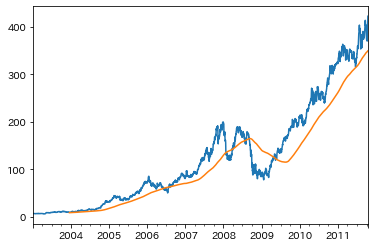

In [32]:
# rollingはシリーズやdfに対して窓(機関数を指定)を指定する
# この例では250日の移動平均を得る
# デフォルトでは窓内の全ての値が欠損値でない事

close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [36]:
#　窓関数の期間よりデータ数が少ないことを考慮
apple_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
apple_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

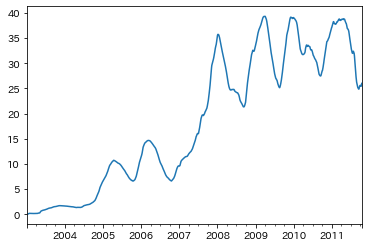

In [37]:
apple_std250.plot()

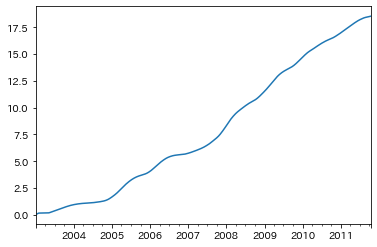

In [39]:
# 拡大する窓関数の平均はexpandingを使う
expanding_mean = apple_std250.expanding().mean()
expanding_mean.plot()

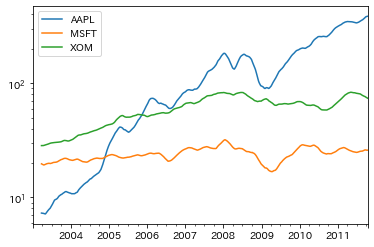

In [40]:
# dfで移動する窓関数を使う
close_px.rolling(60).mean().plot(logy= True)

In [41]:
# rolling関数は固定期間を指すオフセット文字列もOK
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## 11.7.1 指数加重関数

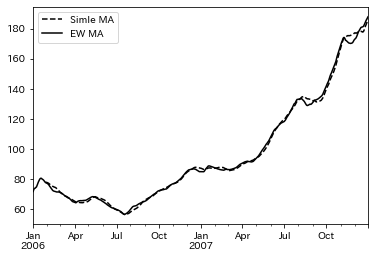

In [46]:
# ewmでより最近の観測値を強く重みつけする

appl_px = close_px.AAPL['2006': '2007']

ma60 = appl_px.rolling(30, min_periods=20).mean()
ewma60 = appl_px.ewm(span=30).mean()

ma60.plot(style='k--', label='Simle MA', legend=True)
ewma60.plot(style='k-', label='EW MA', legend=True)

## 11.7.2 ２つ値がある場合の移動する窓関数

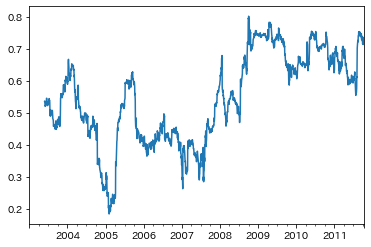

In [48]:
#　時系列データを使った相関や共分散
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

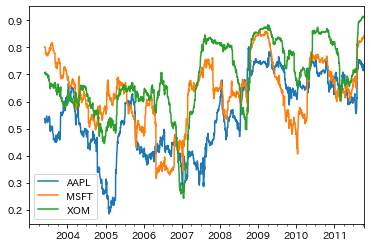

In [50]:
# dfとシリーズの各列どの相関
corr2 = returns.rolling(125, min_periods=100).corr(spx_rets)
corr2.plot()

## 11.7.3 ユーザ定義の移動する窓関数

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


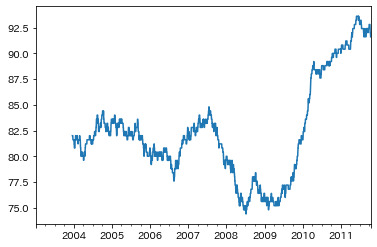

In [53]:
# rollingにapplyメソッドを適用できる
# 独自関数は各配列から１つの値だけ生成する必要あり

# 例はデータの分位点を計算する（ある値が何パーセント点に位置するか?)

from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

# 12章　pandas応用編